# Mlxtend for Regression model

In [1]:
from mlxtend.evaluate import bias_variance_decomp
from sklearn.tree import DecisionTreeClassifier
from mlxtend.data import iris_data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
#We will load the Boston house dataset for our example
from sklearn.datasets import load_boston
from sklearn import metrics
# From the library load the necessary rows & columns
X, y = load_boston(return_X_y=True)
print(X.shape)
print(y.shape)
# Split the dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# Model definition
model_lr = LinearRegression()
# Estimation of bias and variance using bias_variance_decomp 
#Note here we are using loss as 'mse' and setting default bootstrap num_rounds to 200
mse, bias, var = bias_variance_decomp(model_lr, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=123)
y_pred=model_lr.predict(X_test)
# summarize results
print('MSE from bias_variance lib [avg expected loss]: %.3f' % mse)
print('Avg Bias: %.3f' % bias)
print('Avg Variance: %.3f' % var)
print('Mean Square error by Sckit-learn lib: %.3f' % metrics.mean_squared_error(y_test,y_pred))

(506, 13)
(506,)
MSE from bias_variance lib [avg expected loss]: 22.219
Avg Bias: 20.527
Avg Variance: 1.692
Mean Square error by Sckit-learn lib: 22.069


### Tuning the Linear Regression model



In [3]:
lasso_model = Lasso(alpha=0.05)
error_reg_las, bias_reg_las, var_reg_las = bias_variance_decomp(lasso_model, X_train, y_train, X_test, y_test, loss='mse', random_seed=123)
print('MSE from bias_variance lib [avg expected loss]: %.3f' % error_reg_las)
print('Avg Bias: %.3f' % bias_reg_las)
print('Avg Variance: %.3f' % var_reg_las)
print('Mean Square error by Sckit-learn lib: %.3f' % metrics.mean_squared_error(y_test,y_pred))

MSE from bias_variance lib [avg expected loss]: 22.141
Avg Bias: 20.415
Avg Variance: 1.726
Mean Square error by Sckit-learn lib: 22.069


# Mlxtend for Classification model

In [4]:
#Let us consider Iris dataset to calculate the bias vs variance
from sklearn.metrics import zero_one_loss
X, y = iris_data()
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=123,
                                                    shuffle=True,
                                                    stratify=y)


###  Logistic Regression

In [5]:
from sklearn.linear_model import LogisticRegression
clf_logit = LogisticRegression()

#Note here we have changed the loss to '0-1 loss'
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        clf_logit, X_train, y_train, X_test, y_test, 
        loss='0-1_loss',
        random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)


Average expected loss: 0.034
Average bias: 0.022
Average variance: 0.016


### Decision Tree Classifier

In [6]:

clf_dt = DecisionTreeClassifier(random_state=123)
clf_dt.fit(X_train,y_train)
y_pred=clf_dt.predict(X_test)

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        clf_dt, X_train, y_train, X_test, y_test, 
        loss='0-1_loss',
        random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)
print('Sklearn 0-1 loss: %.3f' % zero_one_loss(y_test,y_pred))


### After Pruning ###
clf_dt_prnd = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=123)
clf_dt_prnd.fit(X_train,y_train)
y_pred=clf_dt_prnd.predict(X_test)

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        clf_dt_prnd, X_train, y_train, X_test, y_test, 
        loss='0-1_loss',
        random_seed=123)

print('Average expected loss--After pruning: %.3f' % avg_expected_loss)
print('Average bias--After pruning: %.3f' % avg_bias)
print('Average variance--After pruning: %.3f' % avg_var)
print('Sklearn 0-1 loss--After pruning: %.3f' % zero_one_loss(y_test,y_pred))

Average expected loss: 0.062
Average bias: 0.022
Average variance: 0.040
Sklearn 0-1 loss: 0.133
Average expected loss--After pruning: 0.060
Average bias--After pruning: 0.022
Average variance--After pruning: 0.038
Sklearn 0-1 loss--After pruning: 0.089


### Random Forest Classifer


In [7]:

clf_RF = RandomForestClassifier(max_depth=2, random_state=0)
clf_RF.fit(X_train,y_train)
y_pred=clf_RF.predict(X_test)

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        clf_RF, X_train, y_train, X_test, y_test, 
        loss='0-1_loss',
        random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)
print('Sklearn 0-1 loss: %.3f' % zero_one_loss(y_test,y_pred))

Average expected loss: 0.045
Average bias: 0.022
Average variance: 0.023
Sklearn 0-1 loss: 0.022


#### To derive some implications usin KNN Classifier

In [8]:
from sklearn.metrics import zero_one_loss
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(X_train,y_train)
y_pred=clf_knn.predict(X_test)


avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        clf_knn, X_train, y_train, X_test, y_test, 
        loss='0-1_loss',
        random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)
print('Sklearn 0-1 loss: %.3f' % zero_one_loss(y_test,y_pred))

Average expected loss: 0.057
Average bias: 0.044
Average variance: 0.035
Sklearn 0-1 loss: 0.044


Average expected loss 0.05233333333333332
Average bias 0.044444444444444446
Average variance 0.03588888888888889
Average expected loss 0.057111111111111106
Average bias 0.044444444444444446
Average variance 0.034666666666666665
Average expected loss 0.05266666666666666
Average bias 0.06666666666666667
Average variance 0.04288888888888889
Average expected loss 0.05533333333333333
Average bias 0.044444444444444446
Average variance 0.033555555555555554
Average expected loss 0.05144444444444444
Average bias 0.06666666666666667
Average variance 0.04366666666666667
Average expected loss 0.050444444444444445
Average bias 0.044444444444444446
Average variance 0.030888888888888893
Average expected loss 0.04622222222222222
Average bias 0.022222222222222223
Average variance 0.04022222222222222
Average expected loss 0.047444444444444435
Average bias 0.044444444444444446
Average variance 0.03166666666666667


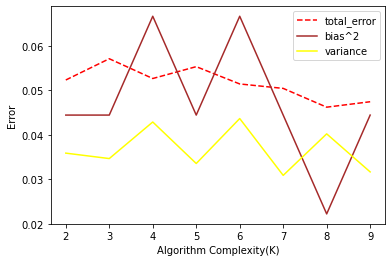

In [9]:
bias_KnnClass, var_KnnClass,error_KnnClass, = [], [], []
for k in range(2, 10):
    clf_knn = KNeighborsClassifier(n_neighbors=k)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(clf_knn, X_train, y_train, X_test, y_test, loss='0-1_loss', random_seed=123)
    bias_KnnClass.append(avg_bias)
    var_KnnClass.append(avg_var)
    error_KnnClass.append(avg_expected_loss)
    print(f"Average expected loss {avg_expected_loss}")
    print(f"Average bias {avg_bias}")
    print(f"Average variance {avg_var}")
plt.plot(range(2, 10), error_KnnClass, 'red', label = 'total_error',linestyle='dashed')
plt.plot(range(2, 10), bias_KnnClass, 'brown', label = 'bias^2')
plt.plot(range(2, 10), var_KnnClass, 'yellow', label = 'variance')
plt.xlabel('Algorithm Complexity(K)')
plt.ylabel('Error')
plt.legend()